In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('./abb/train_v9rqX0R.csv')

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [7]:
# Missing values analysis
missing_values = data.isnull().sum()
missing_percentages = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print(missing_df)

# Duplicates check
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")

                           Missing Values  Percentage
Item_Identifier                         0    0.000000
Item_Weight                          1463   17.165317
Item_Fat_Content                        0    0.000000
Item_Visibility                         0    0.000000
Item_Type                               0    0.000000
Item_MRP                                0    0.000000
Outlet_Identifier                       0    0.000000
Outlet_Establishment_Year               0    0.000000
Outlet_Size                          2410   28.276428
Outlet_Location_Type                    0    0.000000
Outlet_Type                             0    0.000000
Item_Outlet_Sales                       0    0.000000

Number of duplicate rows: 0


Categorical Variables Analysis

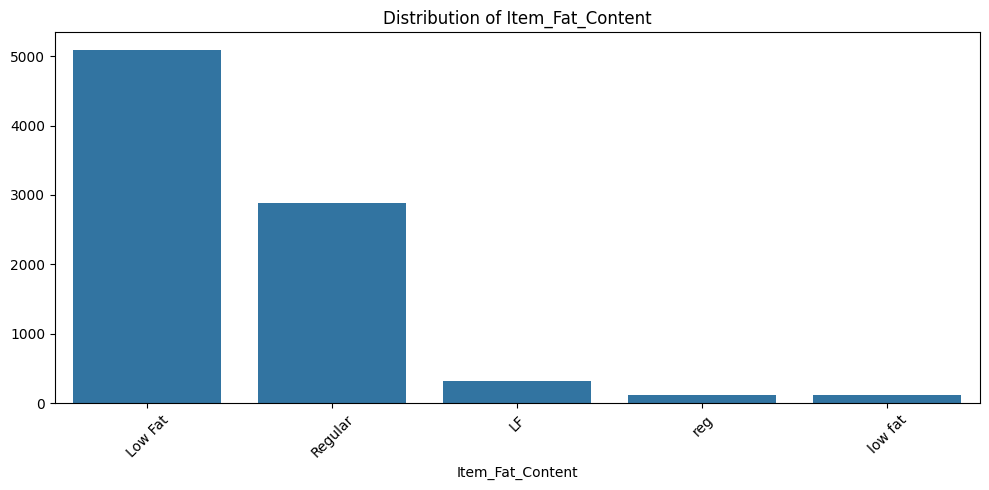


Frequency table for Item_Fat_Content:
                  Count  Percentage
Item_Fat_Content                   
Low Fat            5089   59.709023
Regular            2889   33.896515
LF                  316    3.707615
reg                 117    1.372756
low fat             112    1.314091


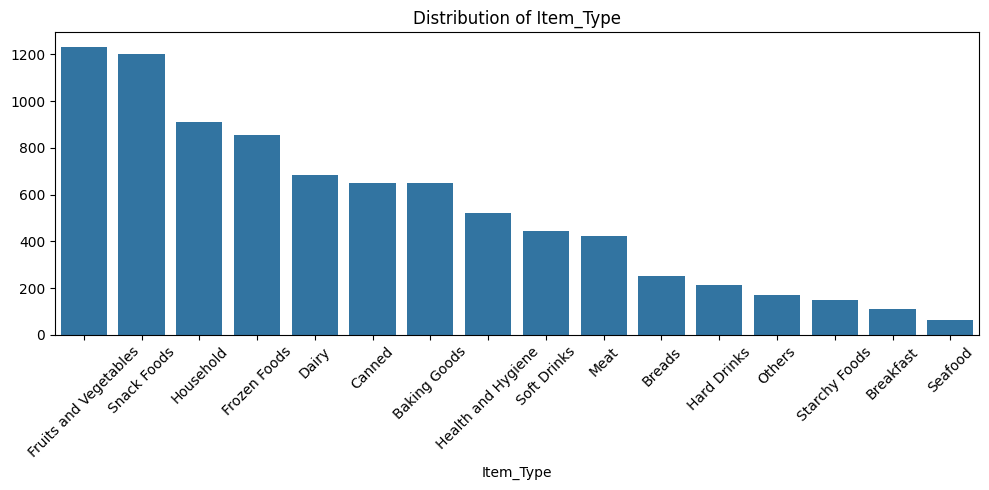


Frequency table for Item_Type:
                       Count  Percentage
Item_Type                               
Fruits and Vegetables   1232   14.455004
Snack Foods             1200   14.079549
Household                910   10.676992
Frozen Foods             856   10.043412
Dairy                    682    8.001877
Canned                   649    7.614690
Baking Goods             648    7.602957
Health and Hygiene       520    6.101138
Soft Drinks              445    5.221166
Meat                     425    4.986507
Breads                   251    2.944972
Hard Drinks              214    2.510853
Others                   169    1.982870
Starchy Foods            148    1.736478
Breakfast                110    1.290625
Seafood                   64    0.750909


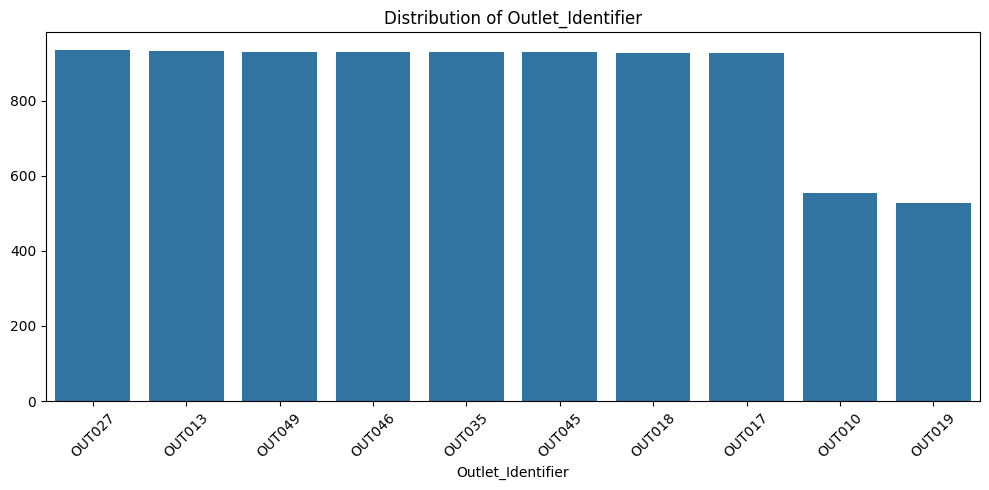


Frequency table for Outlet_Identifier:
                   Count  Percentage
Outlet_Identifier                   
OUT027               935   10.970316
OUT013               932   10.935117
OUT049               930   10.911651
OUT046               930   10.911651
OUT035               930   10.911651
OUT045               929   10.899918
OUT018               928   10.888185
OUT017               926   10.864719
OUT010               555    6.511792
OUT019               528    6.195002


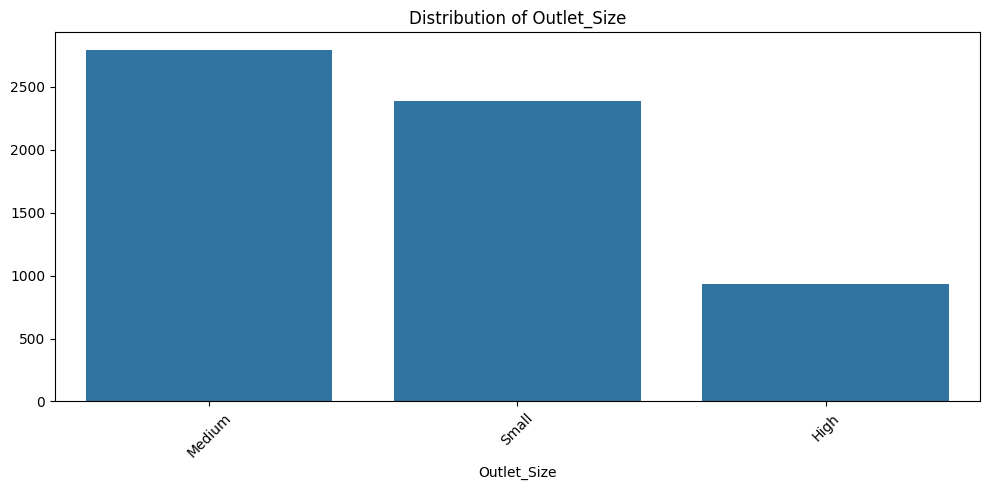


Frequency table for Outlet_Size:
             Count  Percentage
Outlet_Size                   
Medium        2793   32.770151
Small         2388   28.018303
High           932   10.935117


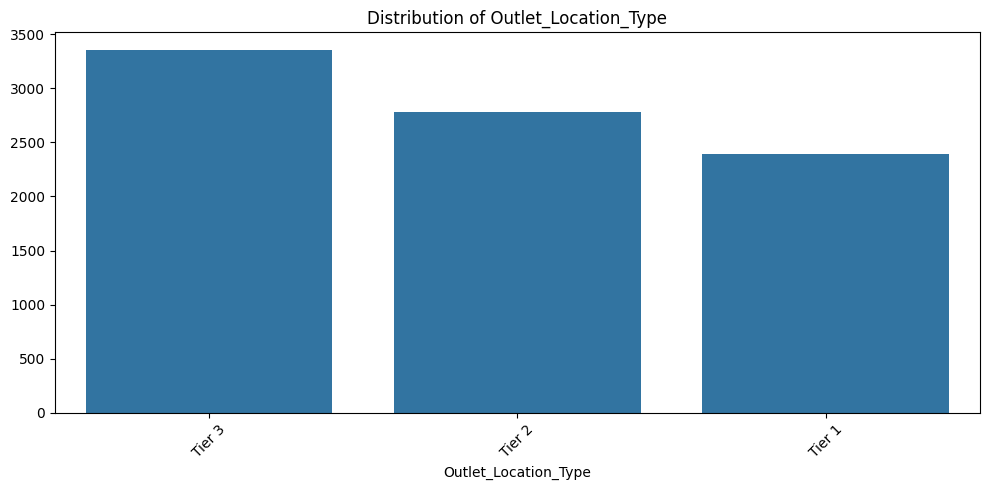


Frequency table for Outlet_Location_Type:
                      Count  Percentage
Outlet_Location_Type                   
Tier 3                 3350   39.305409
Tier 2                 2785   32.676288
Tier 1                 2388   28.018303


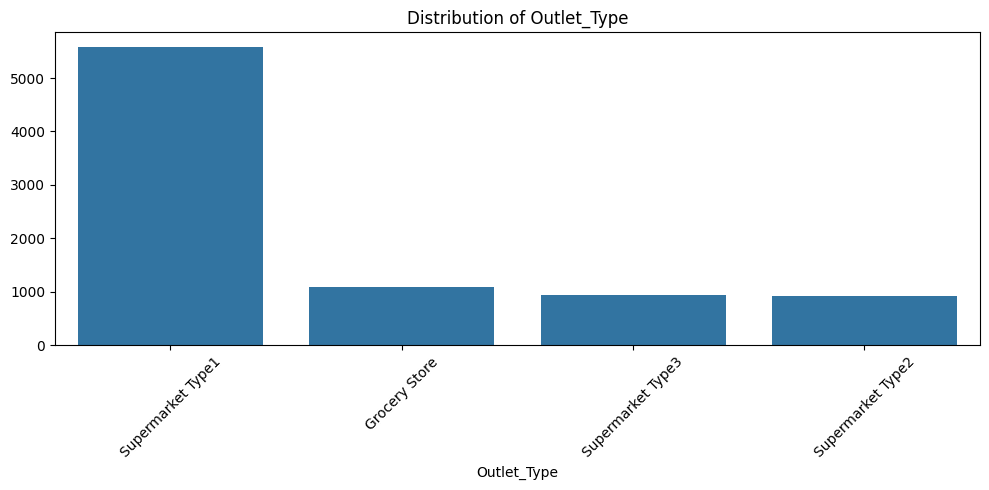


Frequency table for Outlet_Type:
                   Count  Percentage
Outlet_Type                         
Supermarket Type1   5577   65.434706
Grocery Store       1083   12.706793
Supermarket Type3    935   10.970316
Supermarket Type2    928   10.888185


In [12]:
# Analyze categorical variables
categorical_cols = [ 'Item_Fat_Content', 'Item_Type', 
                   'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    value_counts = data[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print frequency table
    print(f"\nFrequency table for {col}:")
    print(pd.DataFrame({
        'Count': value_counts,
        'Percentage': (value_counts / len(data)) * 100
    }))

Numerical Variables Analysis

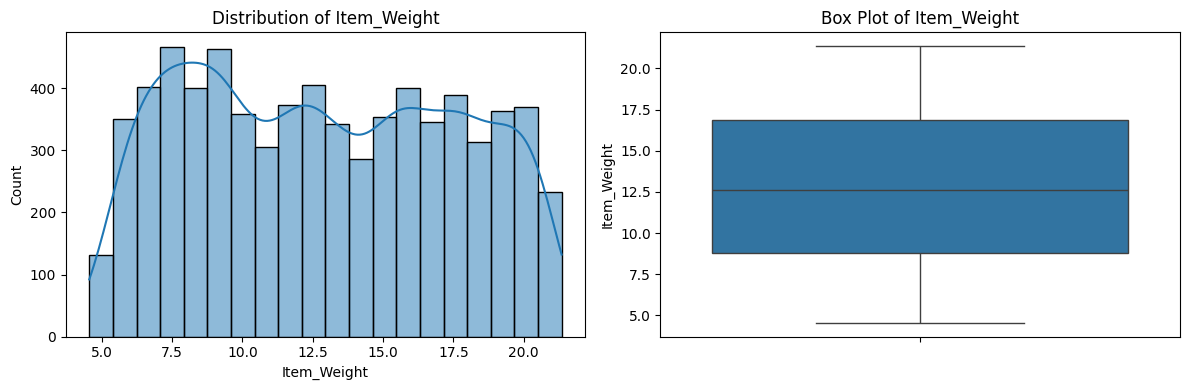


Summary statistics for Item_Weight:
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


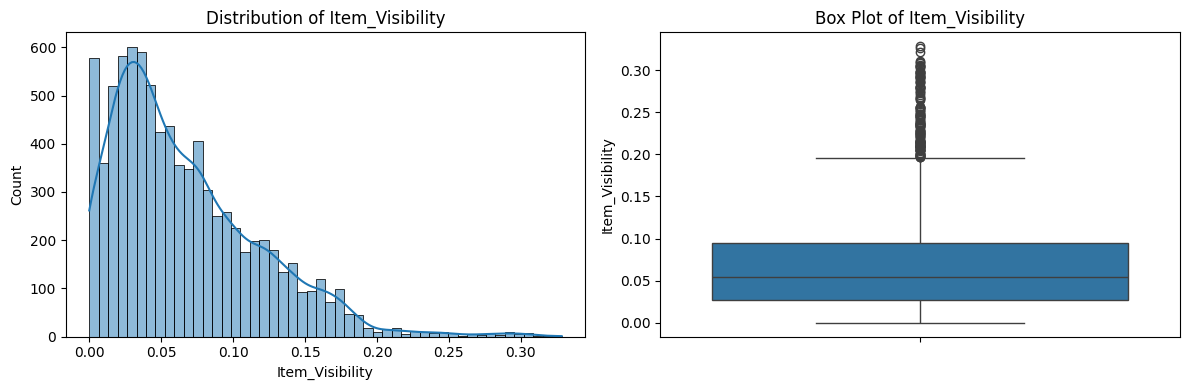


Summary statistics for Item_Visibility:
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


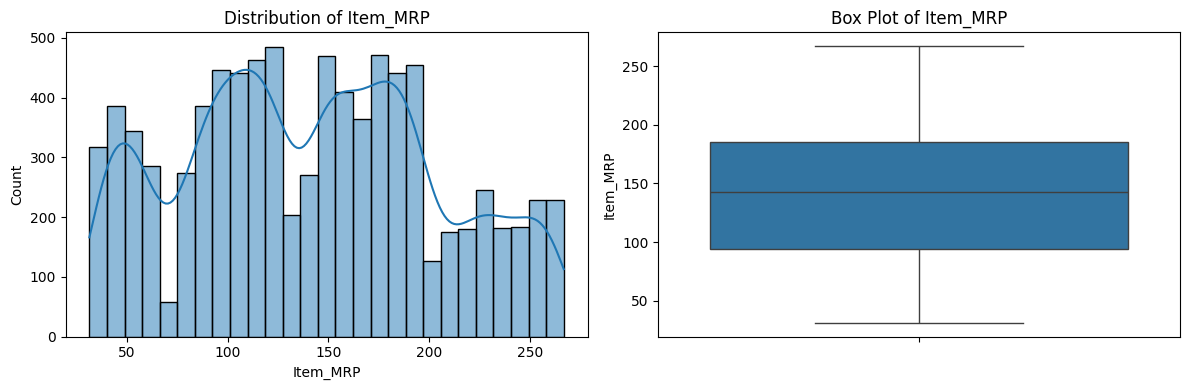


Summary statistics for Item_MRP:
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


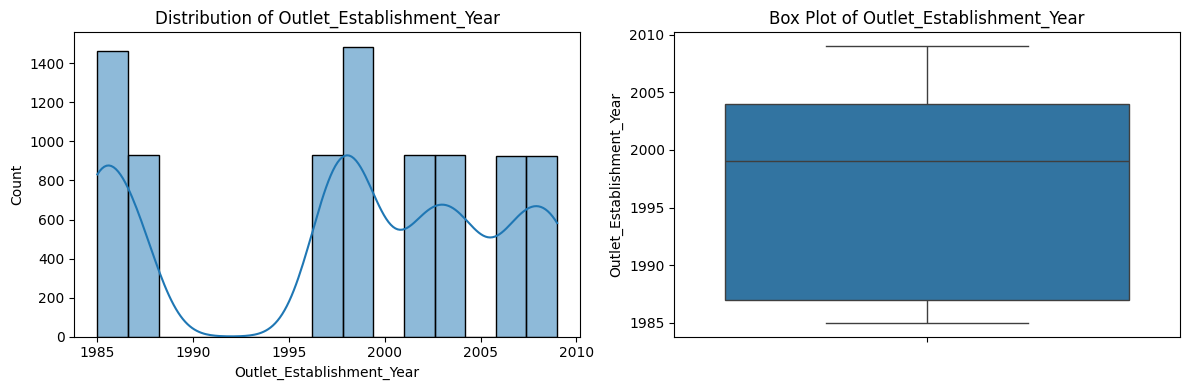


Summary statistics for Outlet_Establishment_Year:
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


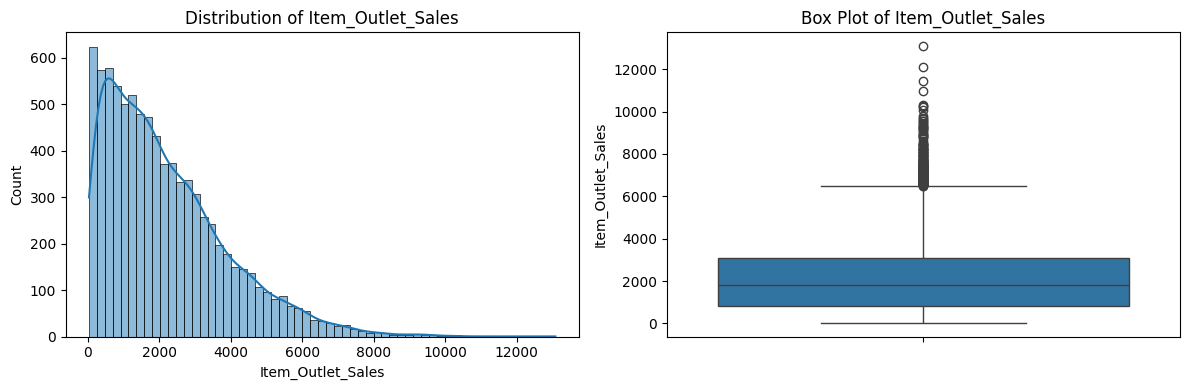


Summary statistics for Item_Outlet_Sales:
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


In [13]:
# Analyze numerical variables
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Distribution plots
for col in numerical_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary statistics for {col}:")
    print(data[col].describe())

Correlation Analysis

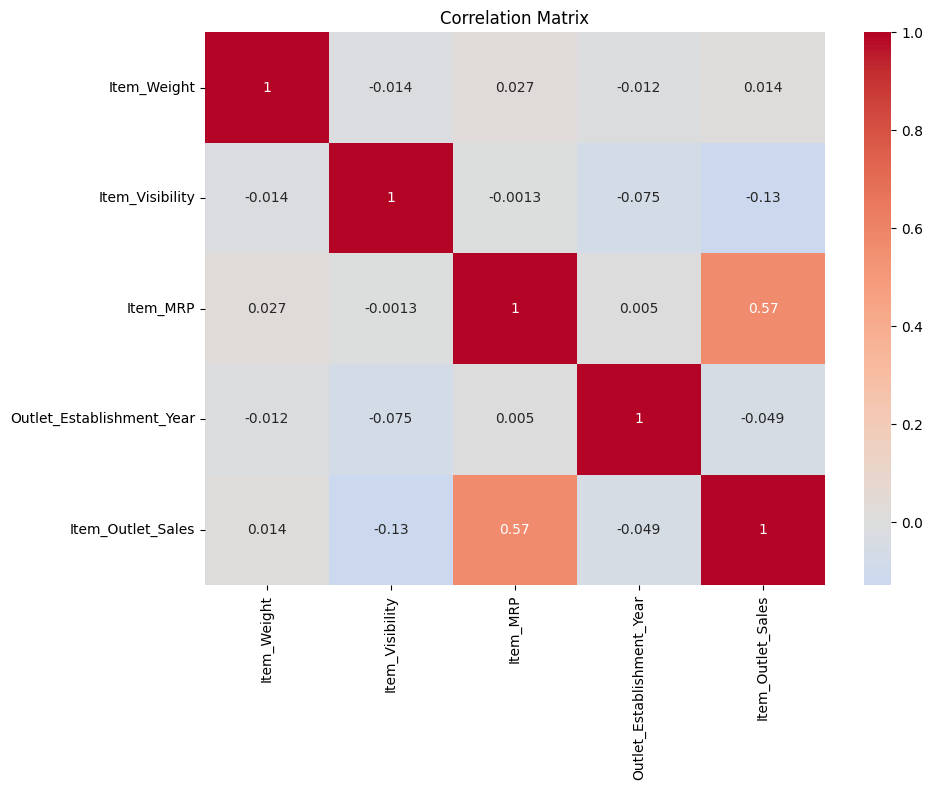

In [14]:
# Correlation matrix for numerical variables
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Target Variable Analysis

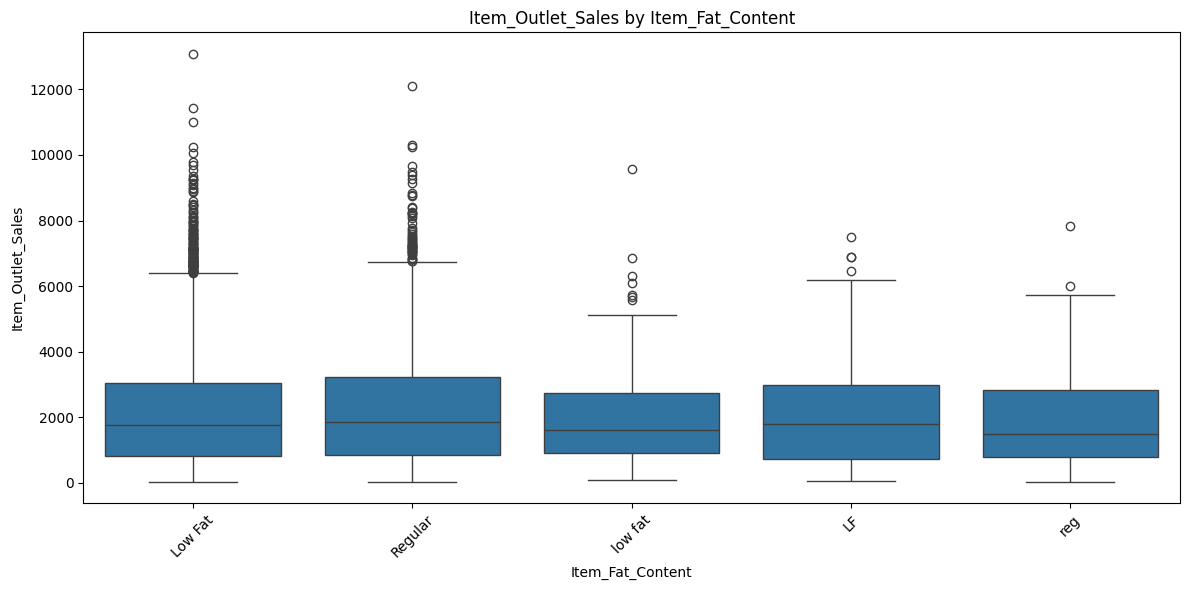

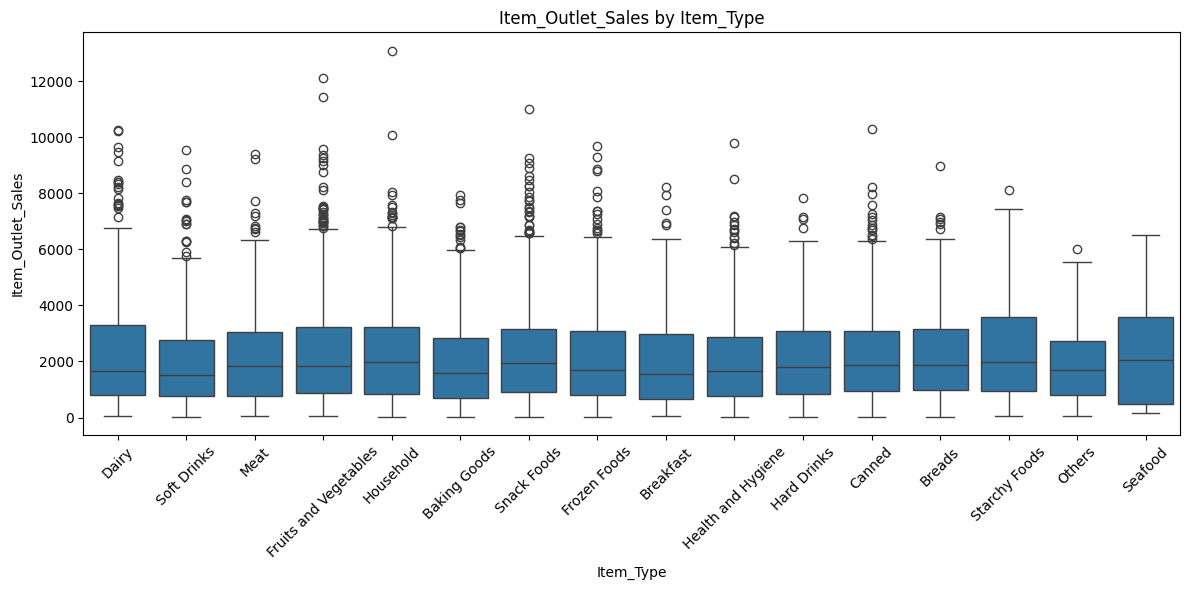

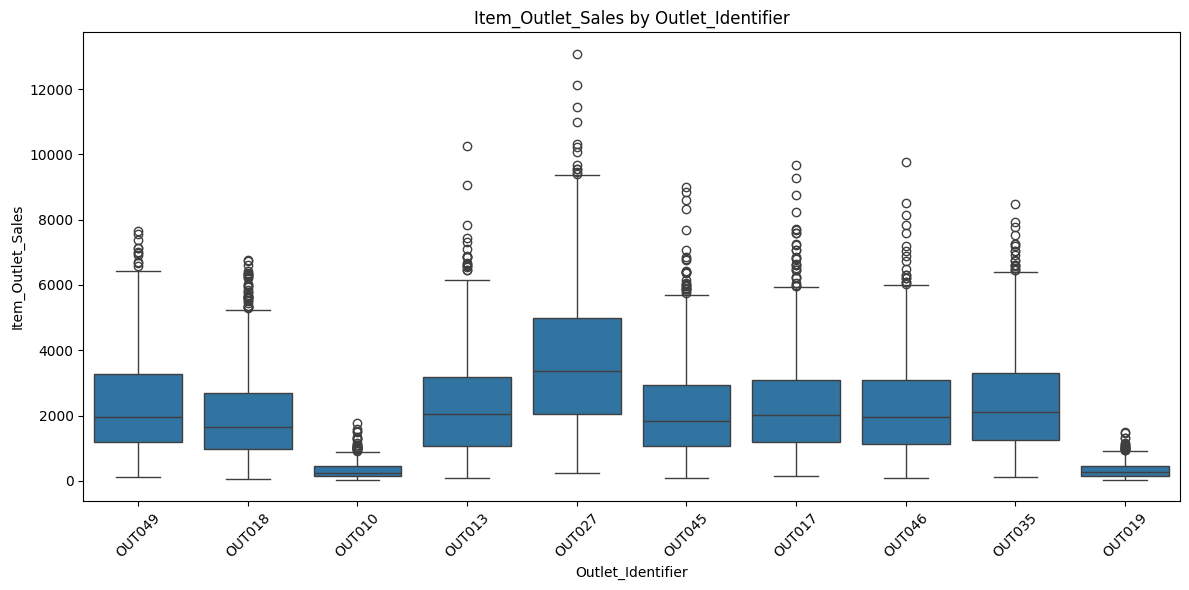

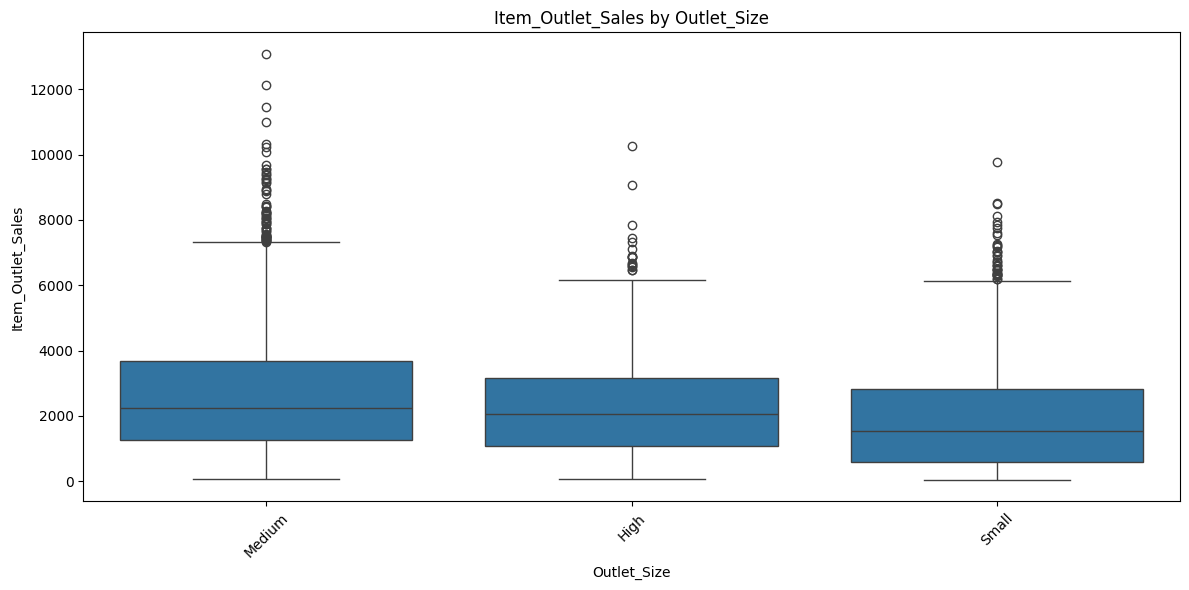

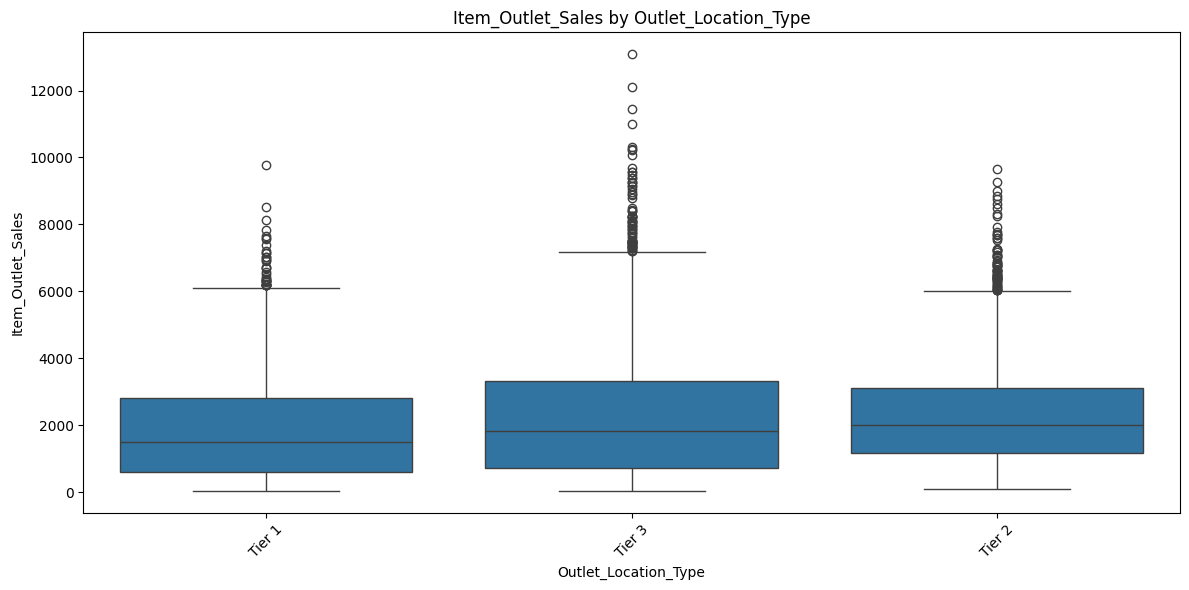

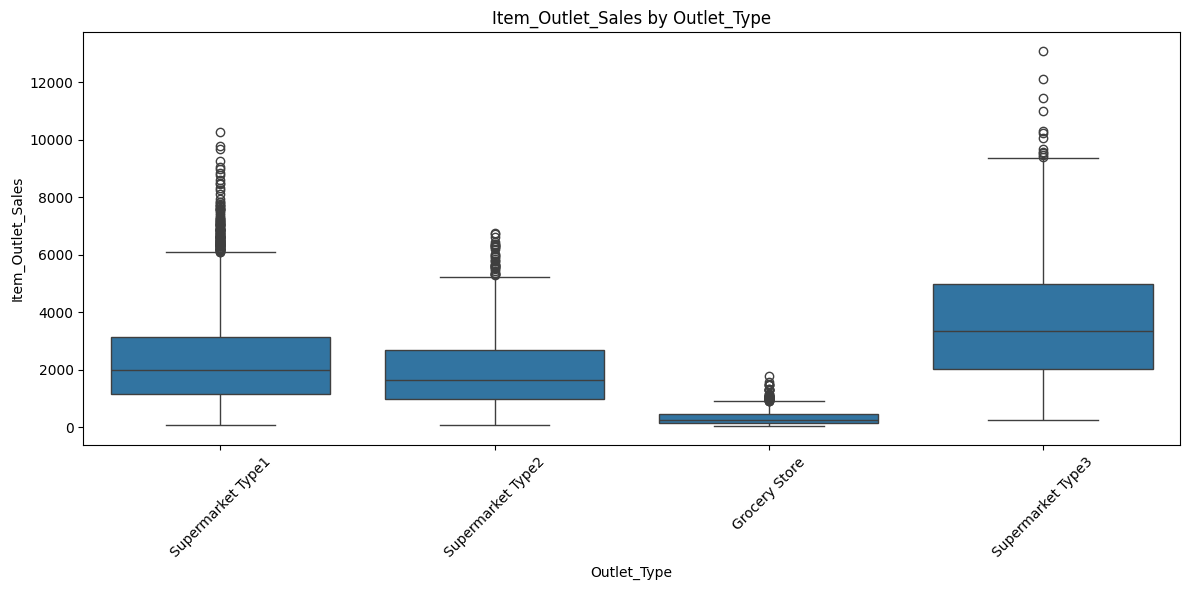

In [16]:
# Target variable distribution across categories
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='Item_Outlet_Sales', data=data)
    plt.title(f'Item_Outlet_Sales by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Feature Relationships

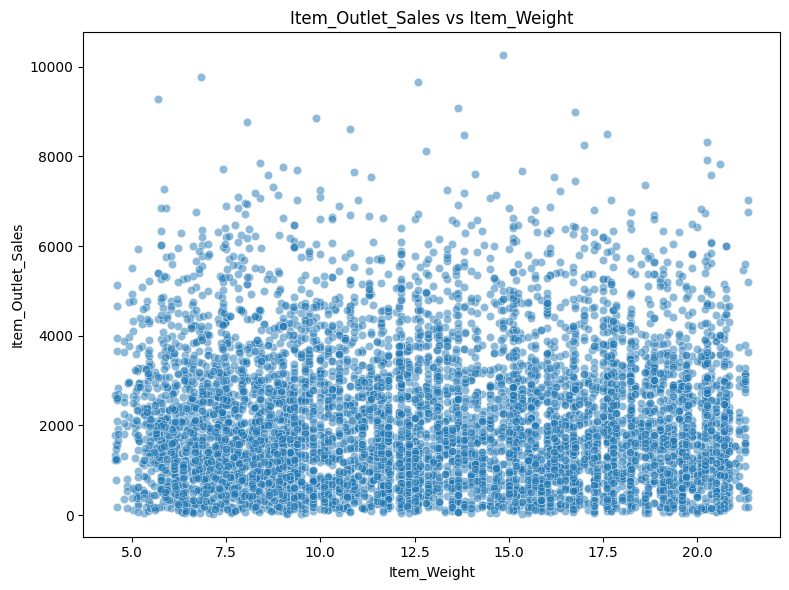

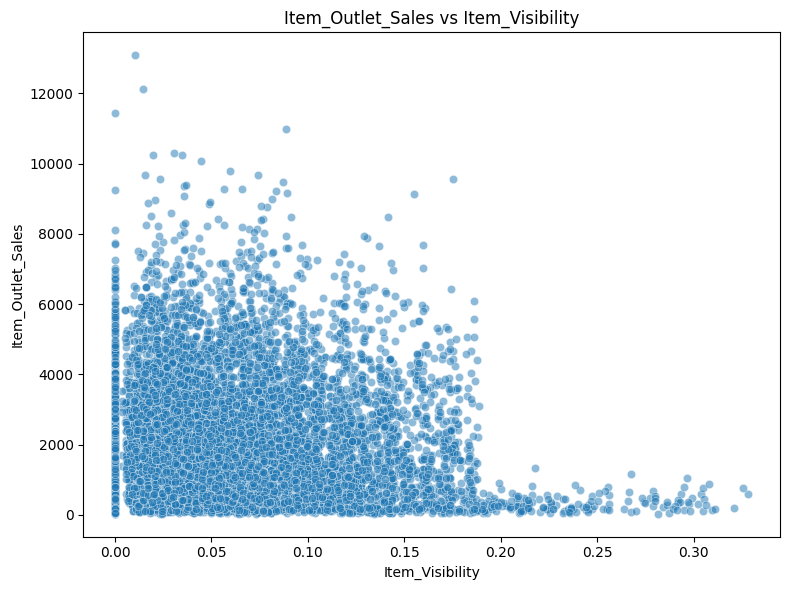

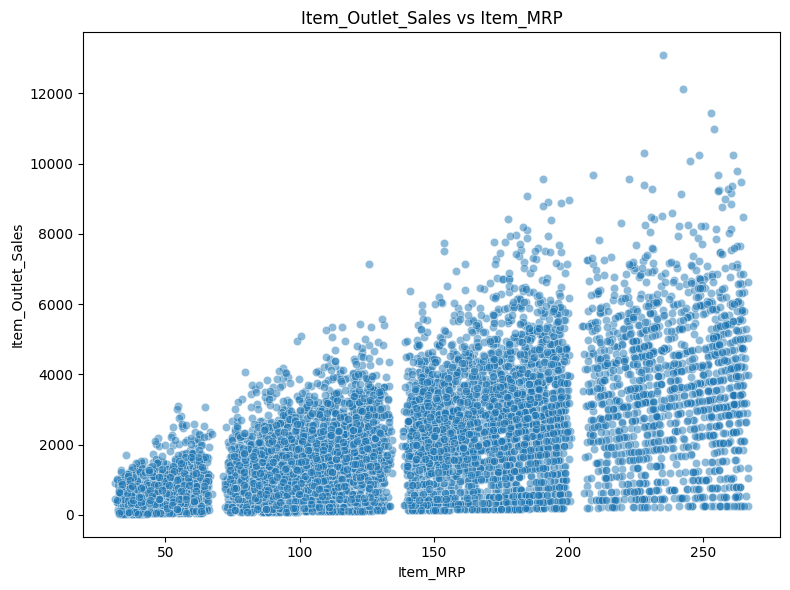

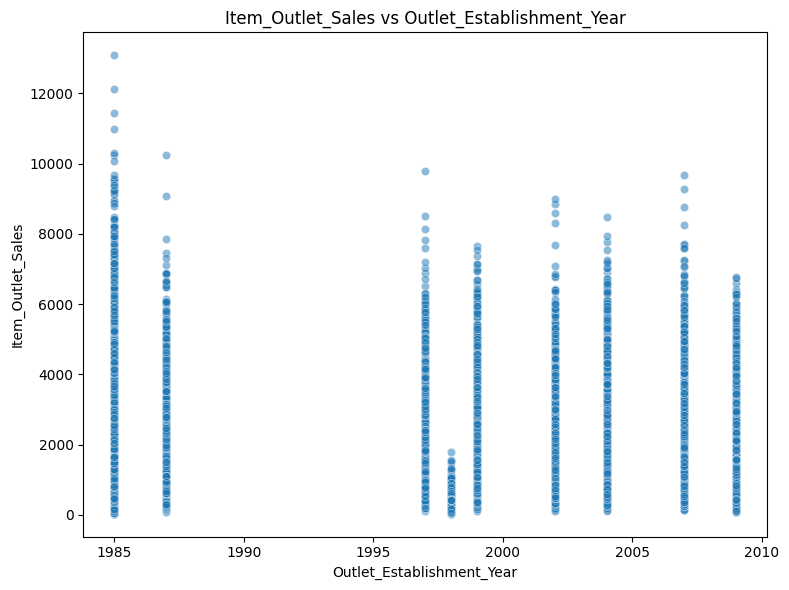

In [17]:
for col in numerical_cols:
    if col != 'Item_Outlet_Sales':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=col, y='Item_Outlet_Sales', data=data, alpha=0.5)
        plt.title(f'Item_Outlet_Sales vs {col}')
        plt.tight_layout()
        plt.show()

Advanced Analysis

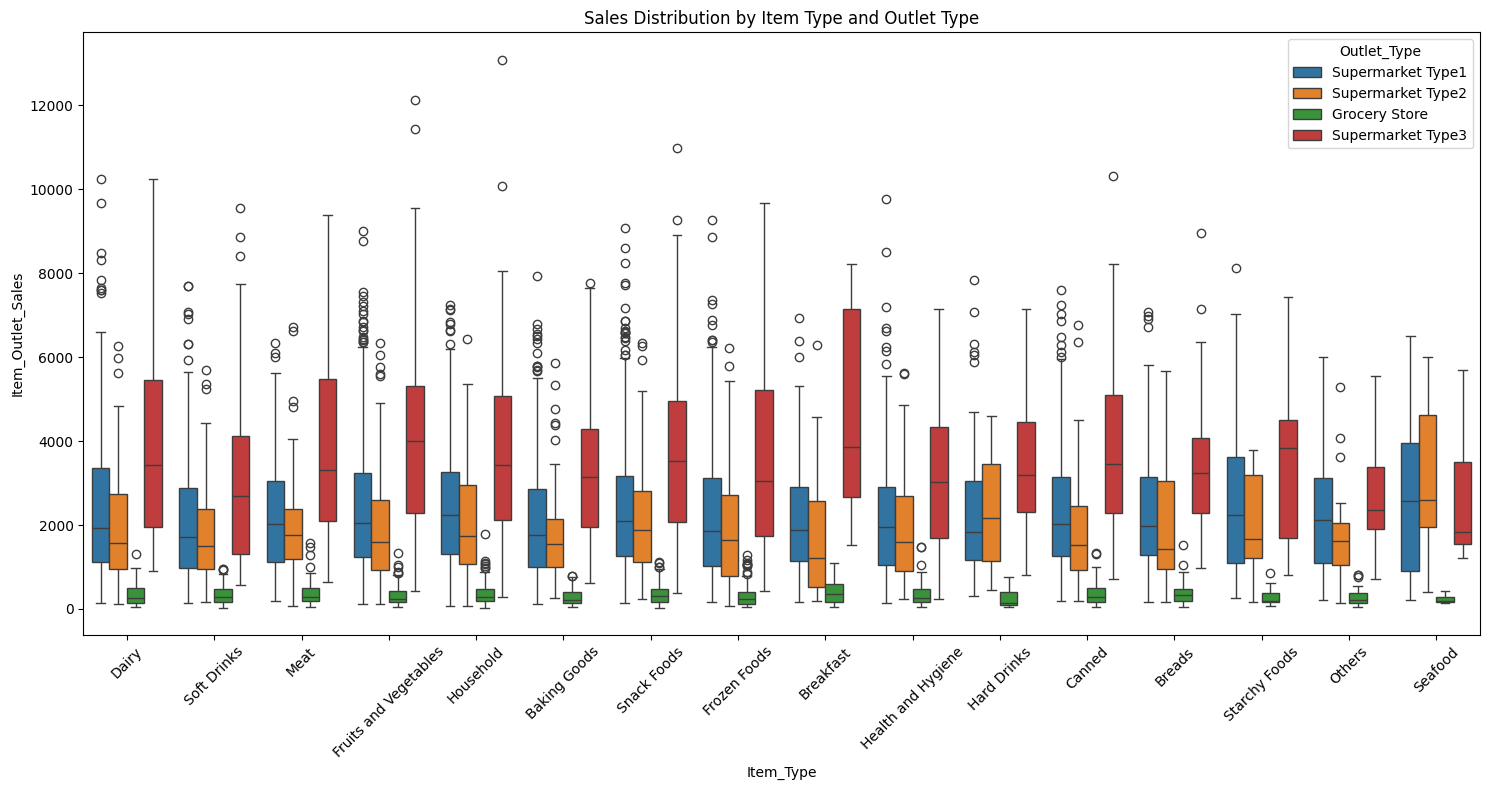

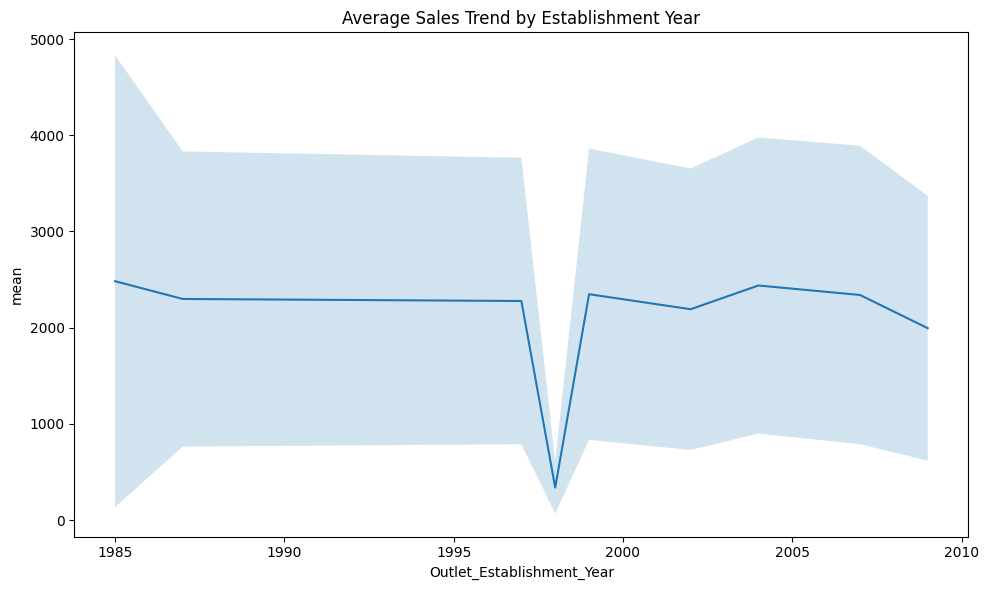

In [18]:
# Item type performance by outlet type
plt.figure(figsize=(15, 8))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type', data=data)
plt.xticks(rotation=45)
plt.title('Sales Distribution by Item Type and Outlet Type')
plt.tight_layout()
plt.show()

# Sales trends by establishment year
yearly_sales = data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].agg(['mean', 'std'])
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_sales.index, y='mean', data=yearly_sales)
plt.fill_between(yearly_sales.index, 
                 yearly_sales['mean'] - yearly_sales['std'],
                 yearly_sales['mean'] + yearly_sales['std'],
                 alpha=0.2)
plt.title('Average Sales Trend by Establishment Year')
plt.tight_layout()
plt.show()